In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

num_species = 10
num_gens = 10

fitness = []

for spec in range(num_species):
    for gen in range(num_gens):
        with open(f"phenotypes/pheno-gen-{gen}-species-{spec}-hidden.json") as f:
            pheno = json.load(f)
            fitness.append(pheno)
        

In [2]:
import pandas as pd
df = pd.DataFrame(fitness)

df[["species", "hidden"]] = df["species"].str.split("-", 1, expand=True)
df["hidden"] = df["hidden"] == "hidden"

cols = df.columns.drop(["sense_hist", "leg_hist", "hidden"])

df[cols] = df[cols].apply(pd.to_numeric)
df

,species,gen,x,y,z,fitness,sense_hist,leg_hist,hidden
0,0,0,-0.171180,-0.899281,1.086173,5,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 2.0, 4.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
1,0,1,-0.171180,-0.899281,1.086173,5,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 2.0, 4.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
2,0,2,-1.364846,-0.683634,1.041313,19,"[0.0, 4.0, 4.0, 0.0, 0.0, 0.0, -4.0, -2.0, -2....","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
3,0,3,-2.389650,2.193502,1.000674,20,"[0.0, 4.0, 4.0, 0.0, -2.0, 0.0, -2.0, 0.0, 0.0...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
4,0,4,0.259351,-1.634673,0.916355,9,"[0.0, 4.0, 4.0, 0.0, -2.0, 0.0, -2.0, -2.0, 0....","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
...,...,...,...,...,...,...,...,...,...
95,9,5,-2.385836,-2.114240,1.018515,28,"[0.0, 4.0, 4.0, 4.0, 4.0, -4.0, 4.0, 2.0, 2.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
96,9,6,-0.602879,-0.579740,0.870687,38,"[0.0, 4.0, 4.0, 4.0, 4.0, -4.0, 4.0, 2.0, 2.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
97,9,7,-0.640514,-0.989662,0.940529,33,"[0.0, 4.0, 4.0, 4.0, 4.0, -4.0, 4.0, 2.0, 2.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True
98,9,8,-0.535890,-0.960034,0.891644,44,"[0.0, 4.0, 4.0, 4.0, 4.0, -4.0, 4.0, 2.0, 2.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...",True


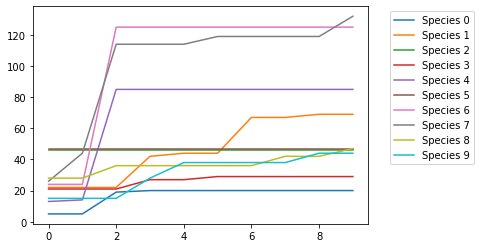

In [3]:
# df[df.species == 3][["fitness", "gen"]].plot(x="gen", y="fitness")
for i in range(num_species):
    arr = df[df.species == i][["gen","fitness"]].to_numpy()
    arr = np.maximum.accumulate(arr, axis=0)
    plt.plot(arr[:,0], arr[:,1], label=f"Species {i}")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

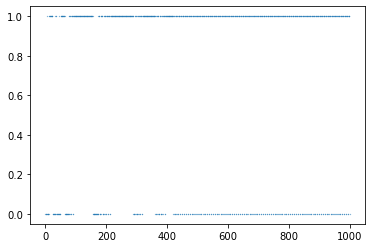

In [4]:
lh = np.asarray(df["leg_hist"][99])
mask = lh[:,0] == -1

foot_down = np.zeros(mask.shape)
# mask
foot_down[mask] = 1
plt.scatter(np.arange(0, len(mask)), foot_down, s=0.05)

In [5]:
# mask = df[["species", "gen", "leg_hist", "fitness"]].fitness > 100
# df[mask]
most_fit_idxs = df.nlargest(3, "fitness").index.to_numpy()

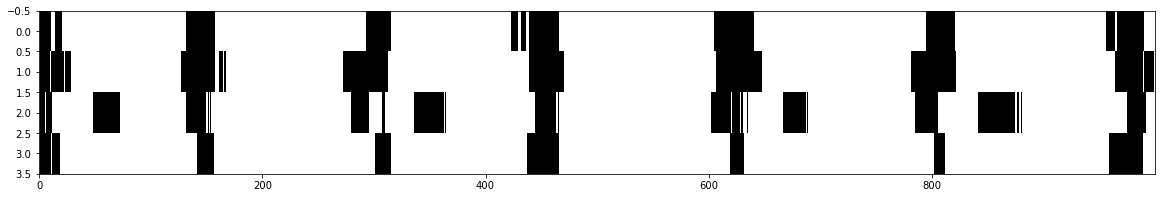

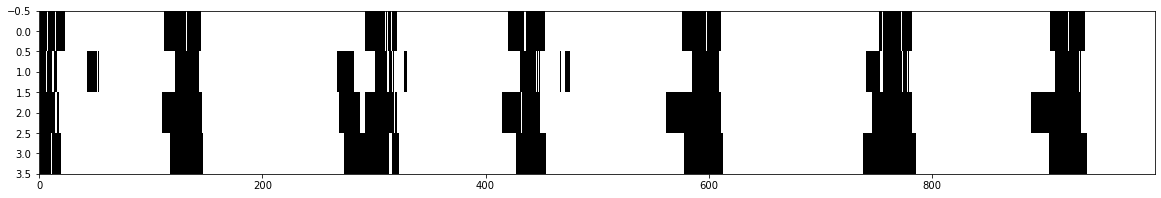

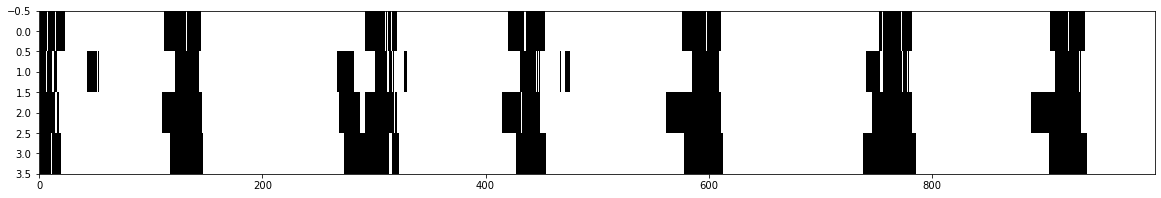

In [6]:
plt.rcParams["figure.figsize"] = (20,3)

for idx in most_fit_idxs:
    lh = np.asarray(df["leg_hist"][idx]).T
    data = lh > 0
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(data, aspect='auto', cmap="binary", interpolation='nearest')

    plt.show()

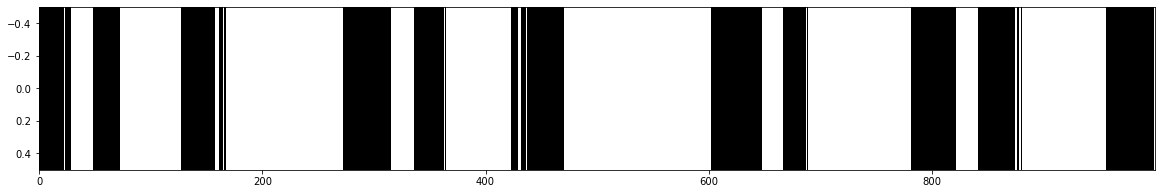

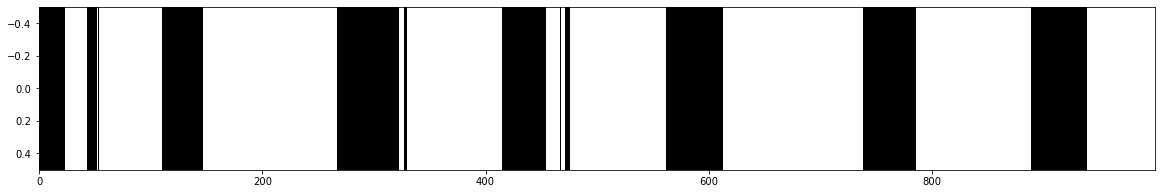

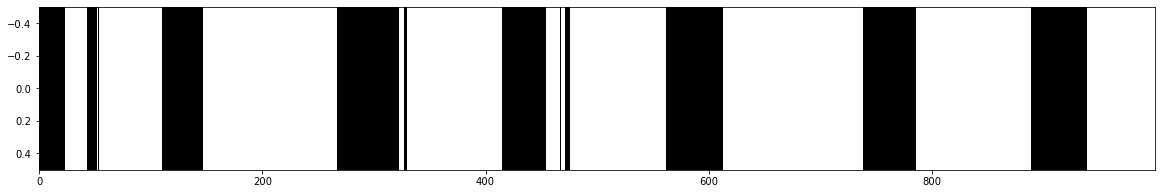

In [7]:
plt.rcParams["figure.figsize"] = (20,3)

for idx in most_fit_idxs:
    lh = np.asarray(df["sense_hist"][idx]).T
    data = lh > -3
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    data = data.reshape((1000, 1)).T
    ax.imshow(data, aspect='auto', cmap="binary", interpolation='nearest')

    plt.show()